In [1]:
# Importing Dependecies
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
# Defining Foursquare Credentials

CLIENT_ID = 'RLWUVCIK4X1JFAHFWJI4VYW3SUASHO3FXWC3RH1FQGTNO2W1' # your Foursquare ID
CLIENT_SECRET = 'YU0HU0JBJ4URNBCJBRRZEJH2YY3WG3QF3P5HQTY2OUYP0L4I' # your Foursquare Secret
ACCESS_TOKEN = '2RILEJEGW40GAJAYZGDD5MTVETQ34ZGBYU4MQODVUUX4GNGZ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RLWUVCIK4X1JFAHFWJI4VYW3SUASHO3FXWC3RH1FQGTNO2W1
CLIENT_SECRET:YU0HU0JBJ4URNBCJBRRZEJH2YY3WG3QF3P5HQTY2OUYP0L4I


In [3]:
# Installing & importing beautifulsoup for website scrapping
! pip install beautifulsoup4

     |████████████████████████████████| 122kB 6.0MB/s eta 0:00:01


In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
# Getting website data into "soup"
URL = 'http://pincode.india-server.com/cities/mumbai/'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [7]:
results = soup.findAll('td') # storing relevant data from "soup" into object "results", relevant data was found with <td> tags

In [8]:
# Cleaning the data
List = []

for i in results:
    List.append(i.text)

List.pop(0)
List.pop(124)
List

['S.No.',
 'Post office',
 'Office type',
 'Pincode',
 '1.',
 'A I Staff Colony ',
 'S.O',
 '400029',
 '2.',
 'Aareymilk Colony ',
 'S.O',
 '400065',
 '3.',
 'Agripada ',
 'S.O',
 '400011',
 '4.',
 'Airport  ',
 'S.O',
 '400099',
 '5.',
 'Ambewadi  ',
 'S.O',
 '400004',
 '6.',
 'Andheri East ',
 'S.O',
 '400069',
 '7.',
 'Andheri ',
 'H.O',
 '400053',
 '8.',
 'Andheri Railway Station ',
 'S.O',
 '400058',
 '9.',
 'Antop Hill ',
 'S.O',
 '400037',
 '10.',
 'Anushakti Nagar ',
 'S.O',
 '400094',
 '11.',
 'Asvini ',
 'S.O',
 '400005',
 '12.',
 'Audit Bhavan ',
 'S.O',
 '400051',
 '13.',
 'Azad Nagar  ',
 'S.O',
 '400053',
 '14.',
 'B P T Colony ',
 'S.O',
 '400037',
 '15.',
 'B.N. Bhavan ',
 'S.O',
 '400051',
 '16.',
 'B.P.Lane ',
 'S.O',
 '400003',
 '17.',
 'Bandra West ',
 'S.O',
 '400050',
 '18.',
 'Bandra(East) ',
 'S.O',
 '400051',
 '19.',
 'Bangur Nagar ',
 'S.O',
 '400104',
 '20.',
 'BARC ',
 'S.O',
 '400085',
 '21.',
 'Barve Nagar ',
 'S.O',
 '400084',
 '22.',
 'Bazargate ',
 'S.O

In [9]:
# Further Cleaning the scraped data and structuring it into a dataframe

List_SNO = List[::4]
List_PO = List[1::4]
List_OT = List[2::4]
List_PIN = List[3::4]

df = pd.DataFrame(list(zip(List_PO, List_PIN)), columns=['Post Office', 'Pin Code'])
df.drop([0], inplace=True)

print(df.head(5))
print(df.shape)

# Output of scraped data is in dataframe "df"

         Post Office Pin Code
1  A I Staff Colony    400029
2  Aareymilk Colony    400065
3          Agripada    400011
4          Airport     400099
5         Ambewadi     400004
(239, 2)


In [10]:
# Getting location coordinates for Post Office names (which is the area indicator) using geolocator

geolocator = Nominatim(user_agent="Mumbai_Explorer")

# Creating a list of locations for easy handling
temp1 = df['Post Office'].values.tolist()

temp2 = []
for i in temp1:
    temp2.append('Mumbai')

address = []

for a in range(len(temp1)):
    address.append(temp1[a]+ temp2[a])

# Location stored in list "address"

In [11]:
# Running a loop for get location coordinates and storing them in two seprate lists

Lat = []
Long = []

for i in address:
    location = geolocator.geocode(i)
    
    if location is None:
        Lat.append('NaN')
        Long.append('NaN')
    else:
        Lat.append(location.latitude)
        Long.append(location.longitude)

In [12]:
# data with location coordinates stored in dataframe "df_final"

df_coord = pd.DataFrame(list(zip(temp1, Lat, Long)), columns=['Post Office', 'Latitude', 'Longitude'])
df_coord.set_index('Post Office', inplace=True)
df_final = pd.merge(df,df_coord[['Latitude', 'Longitude']], on ='Post Office')
df_final.head(5)


,Post Office,Pin Code,Latitude,Longitude
0,A I Staff Colony,400029,NaN,NaN
1,Aareymilk Colony,400065,NaN,NaN
2,Agripada,400011,18.9753,72.8249
3,Airport,400099,19.0901,72.8637
4,Ambewadi,400004,18.9907,72.8413


In [13]:
# Finding areas (Post Office Names) where location coordinates could not be located
df_final.loc[df_final['Latitude'] == 'NaN']

,Post Office,Pin Code,Latitude,Longitude
0,A I Staff Colony,400029,NaN,NaN
1,Aareymilk Colony,400065,NaN,NaN
11,Audit Bhavan,400051,NaN,NaN
21,Bazargate,400001,NaN,NaN
23,BEST STaff Quarters,400012,NaN,NaN
...,...,...,...,...
229,Vileparle Railway Station,400057,NaN,NaN
230,Vileparle(West),400056,NaN,NaN
231,Wadala Rs,400031,NaN,NaN
234,Worli Colony,400030,NaN,NaN


In [14]:
# droping rows total 63 from df_final where coordinates could not be located.
# This should maintain integrity of df_final as we have multiple locations wihtin a PIn Code.

index_names = df_final[ df_final['Latitude'] == 'NaN' ].index 
df_final.drop(index_names, inplace=True)
df_final.shape

(176, 4)

In [15]:
df_final.reset_index(inplace=True)

In [16]:
df_final.head(5)

,index,Post Office,Pin Code,Latitude,Longitude
0,2,Agripada,400011,18.9753,72.8249
1,3,Airport,400099,19.0901,72.8637
2,4,Ambewadi,400004,18.9907,72.8413
3,5,Andheri East,400069,19.1159,72.8542
4,6,Andheri,400053,19.1197,72.8464


In [17]:
# cleaning the dataframe df_final:
df_final.drop(['index'], axis=1, inplace=True)
df_final.head(5)

,Post Office,Pin Code,Latitude,Longitude
0,Agripada,400011,18.9753,72.8249
1,Airport,400099,19.0901,72.8637
2,Ambewadi,400004,18.9907,72.8413
3,Andheri East,400069,19.1159,72.8542
4,Andheri,400053,19.1197,72.8464


As above, we get df_final with area names & their location coordinates, which can be used further for analysis.

***
## Steps followed for anaylsis: ##
1. Analyzing 1 location from df_final to understand the data available on Foursquare.
2. Exporing Foursquare data to get top 10 venues (within 1000 meters) for locations in df_final.
3. Selecting locations where "Indian Cuisines" related venues feature in top 3 most popular venues.
4. Clustering the resulting locations using K-means & finding optimal k
5. Displaying clustered location on the map of Mumbai.
***

In [18]:
# Selecting a location from df_final
location1 = df_final.loc[0][0]
location1

'Agripada '

In [19]:
# Generating url for exploring the location
radius = 1000 #meters
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, df_final.loc[0, 'Latitude'], df_final.loc[0, 'Longitude'], VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=RLWUVCIK4X1JFAHFWJI4VYW3SUASHO3FXWC3RH1FQGTNO2W1&client_secret=YU0HU0JBJ4URNBCJBRRZEJH2YY3WG3QF3P5HQTY2OUYP0L4I&ll=18.9753024,72.8248975&v=20180604&radius=1000&limit=30'

In [20]:
# Making the Foursquare call
results1 = requests.get(url).json()
results1

{'meta': {'code': 200, 'requestId': '603365c5cfd3f9159229b25f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 36,
  'suggestedBounds': {'ne': {'lat': 18.98430240900001,
    'lng': 72.83439691428406},
   'sw': {'lat': 18.966302390999992, 'lng': 72.81539808571596}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4eb6b5ede5fa17fc874e131c',
       'name': 'Celejor',
       'location': {'lat': 18.97584443166727,
        'lng': 72.8236785218938,
        'labeledLatLngs': [{'label': 'display',
          'lat': 18.97584443166727,
          'lng': 72.8236785218938}],
        'distance': 1

In [21]:
# Defining function that extracts the category of the venue from json file
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results1['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flattening JSON

# filtering columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Celejor,Bakery,18.975844,72.823679
1,Tote On The Turf,Nightclub,18.980266,72.820294
2,Mahalaxmi Race Course (Royal Western India Tur...,Club House,18.980535,72.818588
3,cafe coffee day,Coffee Shop,18.976988,72.824051
4,Neel,Indian Restaurant,18.980407,72.820403


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


***
Hence, setting radius as 1000 meters should provide sufficient venues per location to anlyse further. 
Next, creating a function to repeat the same process for all the Areas in Mumbai as identified earlier in "df_final":
***

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making the GET request
        results2 = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results2])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
# Running the above function on each Area and creating a new dataframe called "mumbai_venues".
# This takes a little time considering it needs to populate a large dataframe
mumbai_venues = getNearbyVenues(names=df_final['Post Office'], latitudes=df_final['Latitude'], longitudes=df_final['Longitude'])


Agripada 
Airport  
Ambewadi  
Andheri East 
Andheri 
Andheri Railway Station 
Antop Hill 
Anushakti Nagar 
Asvini 
Azad Nagar  
B P T Colony 
B.N. Bhavan 
B.P.Lane 
Bandra West 
Bandra(East) 
Bangur Nagar 
BARC 
Barve Nagar 
Best Staff Colony 
Bhandup Complex 
Bhandup East 
Bhandup West 
Bharat Nagar  
Bhawani Shankar 
Borivali East 
Borivali 
Borivali West 
Central Building 
Century Mill 
Chakala Midc 
Chamarbaug 
Charkop 
Charni Road 
Chembur 
Chinchbunder 
Chinchpokli 
Chunabhatti 
Churchgate 
Colaba 
Cotton Exchange 
Cumballa Hill 
Dadar Colony 
Dadar 
Dahisar 
Danda 
Daulat Nagar  
Delisle Road 
Dharavi Road 
Dharavi 
Dockyard Road 
Dr Deshmukh Marg 
Falkland Road 
FCI 
Ghatkopar West 
Girgaon 
Gokhale Road  
Goregaon East 
Goregaon  
Govandi 
Government Colony 
Gowalia Tank 
Grant Road 
H.M.P. School 
Haines Road 
Haji Ali 
Hanuman Road 
High Court Building  
Holiday Camp 
Ins Hamla 
International Airport 
IRLA 
J.B. Nagar 
J.J.Hospital 
J.M. Road 
Jacob Circle 
Jogeshwari East 

In [26]:
print(mumbai_venues.shape)
mumbai_venues.head()
# We get a large dataframe to work with

(4065, 7)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agripada,18.975302,72.824898,Celejor,18.975844,72.823679,Bakery
1,Agripada,18.975302,72.824898,Tote On The Turf,18.980266,72.820294,Nightclub
2,Agripada,18.975302,72.824898,Mahalaxmi Race Course (Royal Western India Tur...,18.980535,72.818588,Club House
3,Agripada,18.975302,72.824898,cafe coffee day,18.976988,72.824051,Coffee Shop
4,Agripada,18.975302,72.824898,Neel,18.980407,72.820403,Indian Restaurant


In [27]:
print('There are {} uniques categories.'.format(len(mumbai_venues['Venue Category'].unique())))

There are 220 uniques categories.


In [28]:
# Checking how many venues were returned for each Area
mumbai_venues.groupby('Area').count()

,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Area,,,,,,
Agripada,30,30,30,30,30,30
Airport,24,24,24,24,24,24
Ambewadi,18,18,18,18,18,18
Andheri,26,26,26,26,26,26
Andheri East,30,30,30,30,30,30
...,...,...,...,...,...,...
Wadala,8,8,8,8,8,8
Wadala Truck Terminal,9,9,9,9,9,9
Worli,22,22,22,22,22,22


***
## Next, analyzing each Area through: ##
1. Onehot encoding based on venue category.
2. Grouping based on mean of frequency of a venue category occurring in the area.
***

In [29]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Area column back to dataframe
mumbai_onehot['Area'] = mumbai_venues['Area'] 

# move Area column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Area,ATM,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# size of dataframe "mumbai_onehot"
mumbai_onehot.shape

(4065, 221)

In [31]:
# Grouping the above dataframe based on mean of frequency of a venue category occurring in the area:
mumbai_grouped = mumbai_onehot.groupby('Area').mean().reset_index()
mumbai_grouped.head(5)

In [59]:
# Saving dataframe "mumbai_grouped" for further use and prevent changes.
mumbai_grouped.to_csv('mumbai_grouped.csv')

In [64]:
# Loading the saved mumbai_grouped.csv file
mumbai_grouped = pd.read_csv('mumbai_grouped.csv')
mumbai_grouped.head(5)

,Unnamed: 0,Area,ATM,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,Agripada,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,1,Airport,0.0,0.125000,0.0,0.0,0.041667,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.0,0.000000,0.0
2,2,Ambewadi,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.055556,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,3,Andheri,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,4,Andheri East,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0


In [68]:
mumbai_grouped.drop(mumbai_grouped.columns[[0]], axis=1, inplace=True)

In [121]:
#creating a dataframe for name of columns to filter out irrelevant venue categories for our problem

df_columns = pd.DataFrame(list(mumbai_grouped.columns), columns=['Area'])
pd.set_option('display.max_rows',227)
df_columns.set_index('Area', inplace=True)
df_columns.head(5)

""
Area
Area
ATM
Airport
Airport Food Court
Airport Lounge


In [122]:
# Removing irrelevant venue categories "columns" from "df_columns"

exclusion_list = ['Area','ATM',
                          'Airport','Airport Lounge','Airport Service','Antique Shop',
                          'Arcade','Art Gallery','Athletics & Sports',
                          'Auto Workshop','Bank','Bar','Baseball Field',
                          'Beach','Bed & Breakfast','Beer Garden','Big Box Store',
                          'Bistro','Boat or Ferry','Bookstore',
                          'Boutique','Bowling Alley','Brazilian Restaurant','Breakfast Spot',
                          'Brewery','Bridal Shop','Building','Burger Joint',
                          'Burrito Place','Bus Station','Bus Stop',
                          'Cafeteria','Café','Camera Store','Cheese Shop','Chinese Restaurant',
                          'Clothing Store','Club House','Cocktail Bar','Coffee Shop',
                          'College Academic Building','College Auditorium','Comedy Club',
                          'Concert Hall','Convenience Store',
                          'Convention Center','Cosmetics Shop','Coworking Space','Cricket Ground',
                          'Cupcake Shop','Dance Studio','Deli / Bodega','Department Store',
                          'Design Studio','Dessert Shop','Dim Sum Restaurant','Diner',
                          'Donut Shop','Duty-free Shop','Electronics Store',
                          'Event Space','Factory','Falafel Restaurant',
                          'Farm','Farmers Market','Fast Food Restaurant',
                          'Flea Market','Flower Shop','Food','Food & Drink Shop','Food Court',
                          'Food Service','Food Truck','French Restaurant',
                          'Fried Chicken Joint','Furniture / Home Store','Gaming Cafe','Garden',
                          'Garden Center','Gastropub','General Entertainment',
                          'German Restaurant','Gift Shop','Golf Course','Gourmet Shop',
                          'Greek Restaurant','Grocery Store','Gym',
                          'Gym / Fitness Center','Gym Pool','Harbor / Marina','Historic Site',
                          'History Museum','Hockey Arena','Hookah Bar','Hot Dog Joint','Hotel',
                          'Hotel Bar','Ice Cream Shop','Indie Movie Theater',
                          'Irani Cafe','Italian Restaurant','Japanese Restaurant',
                          'Jewelry Store','Juice Bar','Korean Restaurant',
                          'Latin American Restaurant','Light Rail Station','Lighthouse',
                          'Liquor Store','Lounge','Market','Martial Arts School',
                          'Mediterranean Restaurant',"Men's Store",'Metro Station',
                          'Mexican Restaurant','Middle Eastern Restaurant',
                          'Miscellaneous Shop','Mobile Phone Shop','Modern European Restaurant',
                          'Molecular Gastronomy Restaurant','Motorcycle Shop','Mountain',
                          'Movie Theater','Multiplex','Music Store','Music Venue','Neighborhood',
                          'New American Restaurant','Nightclub','Noodle House','Office',
                          'Opera House','Other Great Outdoors','Outdoors & Recreation',
                          'Paper / Office Supplies Store','Park','Performing Arts Venue',
                          'Persian Restaurant','Pet Store','Pharmacy','Pier','Pizza Place',
                          'Platform','Playground','Plaza','Pool','Pub','Racetrack','Resort',
                          'Rest Area','Restaurant','River','Rock Club','Roof Deck',
                          'Salad Place','Salon / Barbershop','Sandwich Place','Scenic Lookout',
                          'Shoe Store','Shop & Service','Shopping Mall','Smoke Shop','Snack Place',
                          'Soccer Field','South American Restaurant','Spa','Spanish Restaurant',
                          'Sporting Goods Shop','Sports Bar','Sports Club','Stadium',
                          'Steakhouse','Supermarket','Sushi Restaurant','Tapas Restaurant',
                          'Tennis Court','Thai Restaurant','Theater','Toy / Game Store','Track',
                          'Track Stadium','Train Station','Turkish Restaurant','Waterfront',
                          'Whisky Bar','Wine Bar','Wine Shop',"Women's Store",'Yoga Studio',
                          'Zoo', 'American Restaurant', 'Asian Restaurant', 'BBQ Joint', 
                          'Bagel Shop', 'Bakery', 'Airport Food Court', 'Auto Garage', 'Campground',
                          'Dive Bar', 'Gun Range', 'Health & Beauty Service', 'Luggage Store', 'Trail',
                          'Vietnamese Restaurant']

In [123]:
for a in exclusion_list:
        df_columns.drop(labels=[a], axis=0, inplace=True)

In [124]:
df_columns.reset_index(inplace=True)
df_columns.head(100)

,Area
0,Bengali Restaurant
1,Chaat Place
2,Goan Restaurant
3,Indian Chinese Restaurant
4,Indian Restaurant
5,Maharashtrian Restaurant
6,Mughlai Restaurant
7,Multicuisine Indian Restaurant
8,North Indian Restaurant
9,Punjabi Restaurant


In [125]:
# Function to sort venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

***
Creating a new dataframe to include top 10 venues in each Area:
***

In [126]:
num_top_venues = 10 #defining number of venues to include

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
area_venues_sorted = pd.DataFrame(columns=columns)
area_venues_sorted['Area'] = mumbai_grouped['Area']

for ind in np.arange(mumbai_grouped.shape[0]):
    area_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

area_venues_sorted.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,Department Store,Coffee Shop,Gym,Pizza Place,Diner,Nightclub,Racetrack
1,Airport,Coffee Shop,Airport,Café,Bar,Donut Shop,Fast Food Restaurant,Lounge,Cocktail Bar,Cupcake Shop,Indian Restaurant
2,Ambewadi,Train Station,Plaza,Hotel,Bar,Bakery,Chinese Restaurant,Lounge,Luggage Store,Maharashtrian Restaurant,Restaurant
3,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Hotel,Chinese Restaurant,Shoe Store,Food Court,Falafel Restaurant,Electronics Store
4,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel,Café,Vegetarian / Vegan Restaurant,Chinese Restaurant,Cocktail Bar,Sandwich Place,Food Truck,Camera Store


In [127]:
# Keeping only top 3 venues
# We are interested in areas where restaurants / food related venue categories feature in top 3:

area_venues_sorted1 = area_venues_sorted.drop(area_venues_sorted.columns[[4,5,6,7,8,9,10]], axis=1)

In [128]:
area_venues_sorted1.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery
1,Airport,Coffee Shop,Airport,Café
2,Ambewadi,Train Station,Plaza,Hotel
3,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant
4,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel


In [129]:
# Comparing "area_venues_sorted1" with the venue categories of our interest "df_columns"
columns = df_columns['Area'].tolist()

In [130]:
df_bool = area_venues_sorted1.isin(columns)
df_bool.head(5)

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,False,True,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,True
4,False,False,True,False


In [131]:
# counting number of "True" values per row in df_bool
counter = df_bool[df_bool==True].count(axis=1)

In [132]:
# converting "counter" into dataframe for better handling
df_counter = counter.to_frame()

In [133]:
# merging area_venues_sorted1 and df_counter, resulting dataframe is "area_venues_sorted2"
area_venues_sorted2 = pd.merge(area_venues_sorted1, df_counter, left_index=True, right_index=True)
area_venues_sorted2.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,0
0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,1
1,Airport,Coffee Shop,Airport,Café,0
2,Ambewadi,Train Station,Plaza,Hotel,0
3,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2
4,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel,1


In [134]:
# Rename Last column
area_venues_sorted2.rename(columns = {0:'True Count'}, inplace = True)
area_venues_sorted2.head()

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,True Count
0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,1
1,Airport,Coffee Shop,Airport,Café,0
2,Ambewadi,Train Station,Plaza,Hotel,0
3,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2
4,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel,1


In [135]:
# Removing areas from "area_venues_sorted2" where True Count == 0 i.e. where there are no indian cuisine restaurants.

index_names = area_venues_sorted2[area_venues_sorted2['True Count'] == 0 ].index
area_venues_sorted3 = area_venues_sorted2.drop(index_names)
area_venues_sorted3.head()

# Resulting dataframe is called "area_venues_sorted3"

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,True Count
0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,1
3,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2
4,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel,1
5,Andheri Railway Station,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2
7,Anushakti Nagar,Food,Indian Restaurant,Fast Food Restaurant,1


In [136]:
area_venues_sorted3.shape

(115, 5)

In [141]:
# Next we need to refine "mumbai_grouped" based on area_venues_sorted3 and df_columns

#creating new list for list of selected areas
refined_area = area_venues_sorted3['Area'].tolist()
refined_categories = df_columns['Area'].tolist()

In [139]:
#selecting only relevant Veune categories & columns from mumbai_grouped:

mumbai_grouped1 = mumbai_grouped[['Area','Bengali Restaurant',
                                  'Chaat Place','Goan Restaurant',
                                  'Indian Chinese Restaurant',
                                  'Indian Restaurant',
                                  'Maharashtrian Restaurant',
                                  'Mughlai Restaurant',
                                  'Multicuisine Indian Restaurant',
                                  'North Indian Restaurant',
                                  'Punjabi Restaurant',
                                  'Rajasthani Restaurant',
                                  'Seafood Restaurant',
                                  'South Indian Restaurant',
                                  'Tea Room',
                                  'Vegetarian / Vegan Restaurant']]

In [142]:
df_bool1 = mumbai_grouped1.isin(refined_area)
df_bool1.head()

,Area,Bengali Restaurant,Chaat Place,Goan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Maharashtrian Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Seafood Restaurant,South Indian Restaurant,Tea Room,Vegetarian / Vegan Restaurant
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [143]:
# counting number of "True" values per row in df_bool1
counter1 = df_bool1[df_bool1==True].count(axis=1)

# converting "counter1" into dataframe for better handling
df_counter1 = counter1.to_frame()

In [144]:
# merging mumbai_grouped1 and df_counter1
mumbai_grouped2 = pd.merge(mumbai_grouped1, df_counter1, left_index=True, right_index=True)
mumbai_grouped2.head()

,Area,Bengali Restaurant,Chaat Place,Goan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Maharashtrian Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Seafood Restaurant,South Indian Restaurant,Tea Room,Vegetarian / Vegan Restaurant,0
0,Agripada,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,Airport,0.0,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,Ambewadi,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0
3,Andheri,0.0,0.0,0.0,0.0,0.153846,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,1
4,Andheri East,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,1


In [145]:
# Rename the last column
mumbai_grouped2.rename(columns = {0:'True Count'}, inplace = True)
mumbai_grouped2.head()

,Area,Bengali Restaurant,Chaat Place,Goan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Maharashtrian Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Seafood Restaurant,South Indian Restaurant,Tea Room,Vegetarian / Vegan Restaurant,True Count
0,Agripada,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,Airport,0.0,0.0,0.0,0.0,0.041667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,Ambewadi,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0
3,Andheri,0.0,0.0,0.0,0.0,0.153846,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,1
4,Andheri East,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,1


In [146]:
# we need to remove areas where True Count == 0 to keep only selected areas:

index_names = mumbai_grouped2[mumbai_grouped2['True Count'] == 0].index

mumbai_grouped3 = mumbai_grouped2.drop(index_names)
mumbai_grouped3.head()

# Resulting dataframe is called "mumbai_grouped3"

,Area,Bengali Restaurant,Chaat Place,Goan Restaurant,Indian Chinese Restaurant,Indian Restaurant,Maharashtrian Restaurant,Mughlai Restaurant,Multicuisine Indian Restaurant,North Indian Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Seafood Restaurant,South Indian Restaurant,Tea Room,Vegetarian / Vegan Restaurant,True Count
0,Agripada,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,Andheri,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,1
4,Andheri East,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,1
5,Andheri Railway Station,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,1
7,Anushakti Nagar,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1


***
## We get mumbai_grouped3 data frame which has:
1. Areas where indian cuisine related venues feature as top 3 most popular venues.
2. Each of the relevant venue categories as one-hot encoded for clustering.
***

In [147]:
mumbai_grouped3.shape

(115, 17)

In [148]:
#droping "Area" column from "mumbai_grouped3" for clustering
mumbai_grouped3 = mumbai_grouped3.drop('Area', 1)

In [154]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [152]:
# finding optimal value of k:

kclusters = range(1, 10)
distortions1 = []
# run k-means clustering
for m in kclusters:
    kmeans = KMeans(n_clusters=m, random_state=0).fit(mumbai_grouped3)
    distortions1.append(sum(np.min(cdist(mumbai_grouped3, kmeans.cluster_centers_,'euclidean'), axis=1)) / mumbai_grouped3.shape[0])

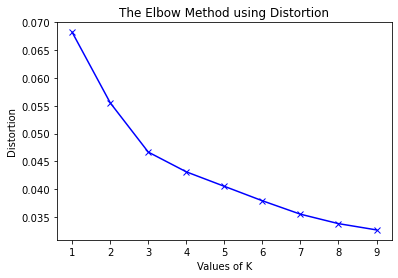

In [155]:
#Creating elbow plot:
plt.plot(kclusters, distortions1, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [156]:
# From above selecting k as 4 and running K means again:

kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_grouped3)

In [157]:
# Creating the final dataframe "mumbai_final":
mumbai_final = area_venues_sorted3

# adding clustering labels
mumbai_final.insert(0, 'Cluster Labels', kmeans.labels_)

In [158]:
mumbai_final.head()

,Cluster Labels,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,True Count
0,0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,1
3,0,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2
4,0,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel,1
5,0,Andheri Railway Station,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2
7,0,Anushakti Nagar,Food,Indian Restaurant,Fast Food Restaurant,1


In [185]:
# getting location coodrinates for Areas in mumbai_final

In [159]:
geolocator = Nominatim(user_agent="Mumbai_Explorer")

temp1 = mumbai_final['Area'].values.tolist()

temp2 = []
for i in temp1:
    temp2.append('Mumbai')

address = []

for a in range(len(temp1)):
    address.append(temp1[a]+ temp2[a])

#Location stored in dataframe "address"

In [160]:
Lat = []
Long = []

for i in address:
    location = geolocator.geocode(i)
    
    if location is None:
        Lat.append('NaN')
        Long.append('NaN')
    else:
        Lat.append(location.latitude)
        Long.append(location.longitude)

In [161]:
df_location = pd.DataFrame(list(zip(temp1, Lat, Long)), columns=['Area', 'Latitude', 'Longitude'])
df_location.set_index('Area', inplace=True)
mumbai_final1 = pd.merge(mumbai_final,df_location[['Latitude', 'Longitude']], on ='Area')
mumbai_final1.head(5)

#Resultant data frame is "mumbai_final1"

,Cluster Labels,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,True Count,Latitude,Longitude
0,0,Agripada,Indian Restaurant,Fast Food Restaurant,Bakery,1,18.975302,72.824898
1,0,Andheri,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2,19.119698,72.846420
2,0,Andheri East,Fast Food Restaurant,Indian Restaurant,Hotel,1,19.115883,72.854202
3,0,Andheri Railway Station,Indian Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,2,19.119698,72.846420
4,0,Anushakti Nagar,Food,Indian Restaurant,Fast Food Restaurant,1,19.039578,72.922156


In [162]:
# Visulaizing Clusters
import folium
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [164]:
# Getting coordinates of Mumbai
mumbai_coordinates = geolocator.geocode('Mumbai')
latitude = mumbai_coordinates.latitude
longitude = mumbai_coordinates.longitude

In [165]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_final1['Latitude'], mumbai_final1['Longitude'], mumbai_final1['Area'], mumbai_final1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [167]:
# Saving mumbai_final1 dataframe as csv:
mumbai_final1.to_csv('mumbai_final1.csv')

In [168]:
! pip install openpyxl

     |████████████████████████████████| 245kB 6.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built et-xmlfile


In [202]:
# Have collated the area wise rent data for mumbai manually  from 99 acres.com, makan.com & magicbricks.com
# Importing data
from openpyxl.workbook import Workbook
mumbai_prop=pd.read_excel('mumbai_rent.xlsx')

In [203]:
# Importing dependencies
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [204]:
mumbai_prop.drop(['Unnamed: 0'], axis=1, inplace=True)

In [205]:
mumbai_prop.head()

,Area,Rent
0,Agripada,28000
1,Andheri,30000
2,Andheri East,23000
3,Andheri Railway Station,13000
4,Anushakti Nagar,30000


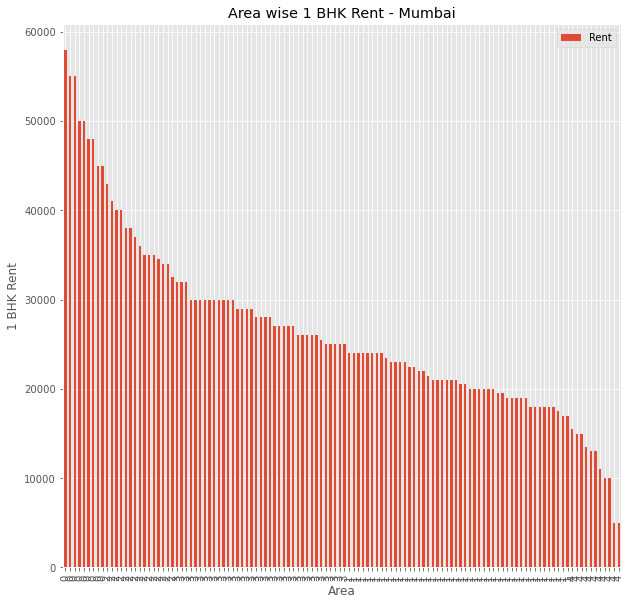

In [248]:
# Generating a bar plot for rent distribution in Mumbai:
mumbai_prop.sort_values(by=['Rent'], ascending=False).plot(kind='bar', figsize=(10,10) )

plt.xlabel('Area')
plt.ylabel('1 BHK Rent')
plt.title('Area wise 1 BHK Rent - Mumbai')

plt.show()

In [207]:
# Clustering mumbai_prop by Rent values by finding optimal k using elbow plot: 

from sklearn import metrics
from scipy.spatial.distance import cdist

mumbai_prop1 = mumbai_prop.drop(['Area'], axis=1)
K = range(1,20)
distortions =[]

for k in K:
    # run k-means clustering
    kmeans_rent = KMeans(n_clusters= k, random_state=0).fit(mumbai_prop1)
    distortions.append(sum(np.min(cdist(mumbai_prop1, kmeans_rent.cluster_centers_,'euclidean'), axis=1)) / mumbai_prop1.shape[0])

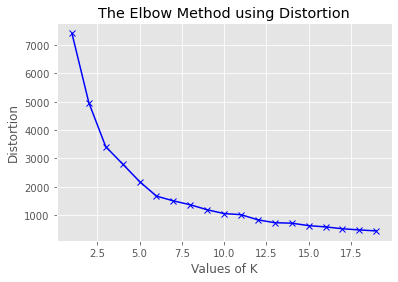

In [208]:
#Creating elbow plot:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [209]:
# Selecting 5 clsuters based on above and running K means again
k=5
kmeans_rent = KMeans(n_clusters= k, random_state=0).fit(mumbai_prop1)

In [210]:
# Adding cluster labels into the datframe
mumbai_prop.insert(0, 'Cluster Labels_rent', kmeans_rent.labels_)

In [211]:
# We get dataframe with clsuters based on 1 BHK rent
mumbai_prop.head(5)

,Cluster Labels_rent,Area,Rent
0,3,Agripada,28000
1,3,Andheri,30000
2,1,Andheri East,23000
3,4,Andheri Railway Station,13000
4,3,Anushakti Nagar,30000


In [212]:
# Checking median rent within wach cluster
mumbai_prop.groupby(['Cluster Labels_rent']).median(['Rent'])

,Rent
Cluster Labels_rent,
0,50000
1,20750
2,36000
3,28000
4,13000


In [214]:
# Selecting areas with rent falling under cluster 2:
mumbai_prop.set_index('Cluster Labels_rent', inplace=True)

In [215]:
mumbai_prop.loc[[2]]

,Area,Rent
Cluster Labels_rent,,
2,Bhawani Shankar,40000
2,Colaba,34500
2,Gokhale Road,43000
2,Grant Road,40000
2,Haines Road,35000
2,Hanuman Road,36000
2,Juhu,38000
2,Khar Colony,41000
2,Mahim,34000


In [219]:
# Creating result_areas dataframe where rent falls under cluster 2 (Cluster Label_rent == 2):
result_areas = mumbai_prop.loc[[2]]
result_areas.set_index('Area', inplace=True)
result_areas

,Rent
Area,
Bhawani Shankar,40000
Colaba,34500
Gokhale Road,43000
Grant Road,40000
Haines Road,35000
Hanuman Road,36000
Juhu,38000
Khar Colony,41000
Mahim,34000


In [220]:
# Merging result_areas and mumbai_final1 through left join to arrive at the shortlisted areas based on cluster
df_result = pd.merge(result_areas, mumbai_final1, on= 'Area', how='left' )

# dataframe is called "df_result"

In [235]:
df_result.dropna(inplace=True)
df_result.drop(['True Count'], axis=1, inplace=True)

In [238]:
df_result['Cluster Labels'] = df_result['Cluster Labels'].astype(int)

In [239]:
df_result

,Area,Rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Latitude,Longitude
0,Bhawani Shankar,40000,0,Indian Restaurant,Coffee Shop,Fast Food Restaurant,19.015929,72.837460
1,Colaba,34500,2,Indian Restaurant,Diner,Hotel,18.915091,72.825969
2,Gokhale Road,43000,2,Lounge,Indian Restaurant,Bakery,19.008791,72.830730
3,Grant Road,40000,0,Indian Restaurant,Bakery,Snack Place,18.964447,72.813573
4,Haines Road,35000,2,Indian Restaurant,Hotel,Shopping Mall,18.989172,72.822429
5,Hanuman Road,36000,1,Indian Restaurant,Bakery,Fast Food Restaurant,18.948282,72.830243
6,Juhu,38000,2,Hotel,Indian Restaurant,Seafood Restaurant,19.107021,72.827528
8,Mahim,34000,0,Indian Restaurant,Fast Food Restaurant,Bakery,19.042314,72.839834
9,Mahim East,34000,0,Indian Restaurant,Fast Food Restaurant,Bakery,19.042314,72.839834
10,Matunga,35000,0,Indian Restaurant,Fast Food Restaurant,South Indian Restaurant,19.027436,72.850147


In [246]:
# create map
map_result = folium.Map(location=[latitude, longitude], zoom_start=11)
clusters = 3

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, rent in zip(df_result['Latitude'], df_result['Longitude'], df_result['Area'], df_result['Cluster Labels'], df_result['Rent']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' Rent ' + str(rent), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=rent/5000,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_result)
       
map_result

Thank You.